## Phase _1 Project Submission

Please fill out:
* Student name: Samuel Lumumba
* Student pace: part time 
* Scheduled project review date/time:Sunday 11:59
* Instructor name:Noah and Daina 



Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

##### Problem Statement: 
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

##### Research questions: 
what are the movies with the highest earnings?, what are their genres?, who made them(studio) ? and what were the  budgets to profit comprison over studio and years? 

## Sart by understanding the content in the different Dataset provides

 ##### import the pandas library, numpy and matplotlib

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### The Movies info dataset

In [199]:
# the Movie_info dataset
df = pd.read_csv(r"C:\Users\Samuel\Desktop\Moringa_Work\dsc-phase-1-project-v2-4\rt.movie_info.tsv\rt.movie_info.tsv", delimiter='\t', encoding='unicode_escape')

Movie_info = df
Movie_info 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [200]:
# Determining the no. of records in our dataset
num_records = Movie_info.shape[0]
print(num_records)

1560


In [201]:
# Dropping all the uneeded rows 
Movie_info.drop(['synopsis', 'director', 'writer', 'runtime'], axis=1, inplace=True)

Movie_info

,id,rating,genre,theater_date,dvd_date,currency,box_office,studio
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,NaN
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012","Jan 1, 2013",$,"600,000",Entertainment One
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,NaN
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,NaN
4,7,NR,Drama|Romance,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962","May 11, 2004",NaN,NaN,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,NaN


In [202]:
# Checking whether each column has an appropriate datatype
Movie_info.dtypes

id               int64
rating          object
genre           object
theater_date    object
dvd_date        object
currency        object
box_office      object
studio          object
dtype: object

In [203]:
# identify missing data in the dataframe
Movie_info.isna().sum()

id                 0
rating             3
genre              8
theater_date     359
dvd_date         359
currency        1220
box_office      1220
studio          1066
dtype: int64

In [204]:
# Remove all the no value rows
Movie_info = Movie_info[Movie_info['rating'].notna()]
Movie_info = Movie_info[Movie_info['genre'].notna()]
Movie_info = Movie_info[Movie_info['theater_date'].notna()]
Movie_info =Movie_info[Movie_info['currency'].notna()]
Movie_info =Movie_info[Movie_info['box_office'].notna()]
Movie_info =Movie_info[Movie_info['studio'].notna()]

In [205]:
Movie_info

,id,rating,genre,theater_date,dvd_date,currency,box_office,studio
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012","Jan 1, 2013",$,"600,000",Entertainment One
6,10,PG-13,Comedy,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",Paramount Pictures
7,13,R,Drama,"Apr 27, 2006","Oct 2, 2007",$,"224,114",Sony Pictures Classics
15,22,R,Comedy|Drama|Mystery and Suspense,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",ATO Pictures
16,23,R,Drama,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",Sony Pictures
...,...,...,...,...,...,...,...,...
1537,1976,NR,Action and Adventure|Art House and International,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",Buffalo Films
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",Universal Pictures
1542,1981,NR,Comedy|Drama,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",Eros Entertainment
1545,1985,R,Horror|Mystery and Suspense,"Jun 1, 2007","Oct 9, 2007",$,"59,371",IDP Distribution


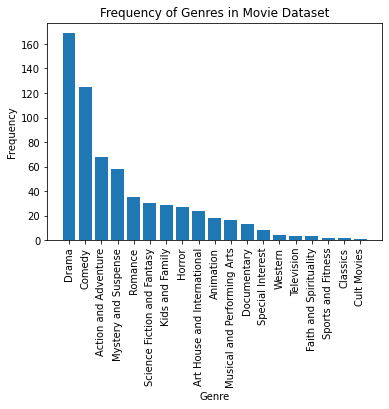

In [206]:
# extract the genres and create separate columns
genres = Movie_info["genre"].str.get_dummies(sep="|")

# sum the boolean values for each genre
genre_counts = genres.sum().sort_values(ascending=False)

# plot the bar graph
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of Genres in Movie Dataset")
plt.show()

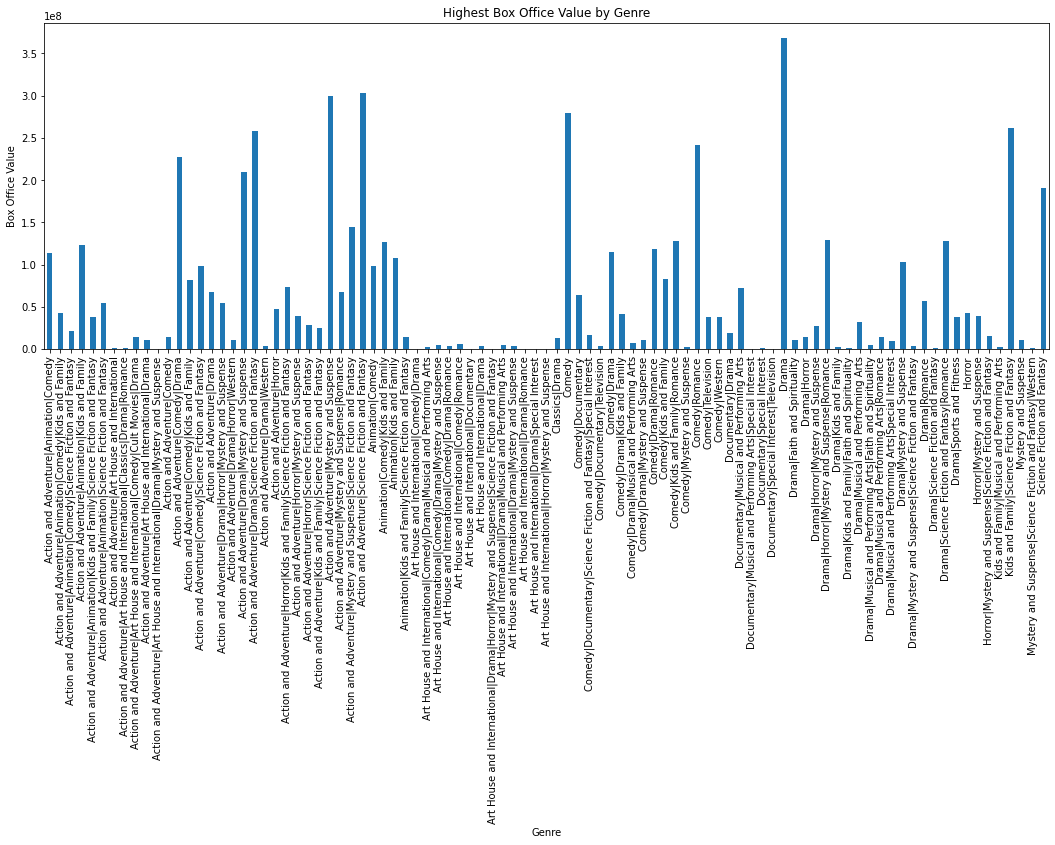

In [229]:
# change the box_office data type from object to numerical
Movie_info['box_office'] = pd.to_numeric(Movie_info['box_office'], errors='coerce')
# Group movies by genre and find the maximum box office value for each genre
max_box_office = Movie_info.groupby('genre')['box_office'].agg('max')

# Create a bar plot of the maximum box office value for each genre
max_box_office.plot(kind='bar', figsize=(18, 6))
plt.title('Highest Box Office Value by Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office Value')
plt.show()



### Conclusion for this data Set :
Drama is the most populor genre among fil makers as it brings in the most in the box office. Leading me to believe that it is the most popular genre for movies/films.Although it still curcail that we give the second and Third higest Box office genres which are  Action and Adventure| Science fiction and fantasy and Action and Adventure| Mystery and suspense respectively. The other two play a role in the analysis that follows. 

### The Movies dataset

In [17]:
# the Movies dataset
df = pd.read_csv(r"C:\Users\Samuel\Desktop\Moringa_Work\dsc-phase-1-project-v2-4\tmdb.movies.csv\tmdb.movies.csv", encoding='unicode_escape')

movies = df
movies 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [39]:
# Determining the no. of records in our dataset
num_records = movies.shape[0]
print(num_records)

26517


In [231]:
# Checking whether each column has an appropriate datatype
movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [233]:
# identify missing data in the dataframe
movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [236]:
# from a visual analysis of the dataset above the en that represent the english language appears more times
# It is the most popular language for movies 
en_movies = movies[movies['original_language'] == 'en']
num_en_movies = len(en_movies)
print(f"There are {num_en_movies} movies with original language set to 'en'.")


There are 23291 movies with original language set to 'en'.


In [239]:
# the Most popular movie in the dataset in the Avenger:Infinity war
max_popularity_index = movies['popularity'].idxmax()
row_with_max_popularity = movies.loc[max_popularity_index]
row_with_max_popularity

Unnamed: 0                            23811
genre_ids                      [12, 28, 14]
id                                   299536
original_language                        en
original_title       Avengers: Infinity War
popularity                           80.773
release_date                     2018-04-27
title                Avengers: Infinity War
vote_average                            8.3
vote_count                            13948
Name: 23811, dtype: object

In [250]:
# Genre which appear the most 
most_common_genres = movies['genre_ids'].value_counts().idxmax()
genre_counts = movies['genre_ids'].value_counts()
genre_counts

[99]                          3700
[]                            2479
[18]                          2268
[35]                          1660
[27]                          1145
                              ... 
[80, 28, 18]                     1
[28, 18, 878, 16]                1
[9648, 10770, 18, 80]            1
[16, 10749, 12, 18, 14]          1
[14, 18, 27, 28, 53, 9648]       1
Name: genre_ids, Length: 2477, dtype: int64

### Conclusion for Movies data Set :
Although no visualization it does provide usefull information such as the most popular language for movies. The most popular movie of the time 2018's Avengers: Infinity War which upon a quick google search fall under Action, Superhero, Science Fiction, Adventure and Fantasy genres. This is expecially the most interesting find as it relates to the over data set on popular genres

### The Movie budget dataset

In [85]:
# the Movie budget dataset
df = pd.read_csv(r"C:\Users\Samuel\Desktop\Moringa_Work\dsc-phase-1-project-v2-4\tn.movie_budgets.csv\tn.movie_budgets.csv", encoding='unicode_escape')

Movie_budgets = df
Movie_budgets 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [86]:
# Determining the no. of records in our dataset
num_records = Movie_budgets.shape[0]
print(num_records)

5782


In [87]:
# Checking whether each column has an appropriate datatype
Movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [88]:
# identify missing data in the dataframe
Movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [92]:
# Dealing with the Missing Data
import numpy as np
Movie_budgets = Movie_budgets.replace({'$0': np.nan, 0: np.nan})
# Dropping rows with worldwide_gross and domestic_gross having no value
Movie_budgets = Movie_budgets.loc[Movie_gross['domestic_gross'].notna() & Movie_budgets['worldwide_gross'].notna()]

Movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
3382,83,"Jun 15, 1979",Prophecy,"$12,000,000","$22,673,340","$22,673,340"
3383,84,"Jan 30, 2015",Project Almanac,"$12,000,000","$22,348,241","$32,909,437"
3384,85,"May 14, 2010",Just Wright,"$12,000,000","$21,540,363","$21,867,665"
3385,86,"Sep 10, 1999",Stir of Echoes,"$12,000,000","$21,133,087","$21,133,087"


In [146]:
# Convert production_budget, domestic_gross, and worldwide_gross to float
Movie_budgets['domestic_gross'] = pd.to_numeric(Movie_budgets['domestic_gross'], errors='coerce')
Movie_budgets['worldwide_gross'] = pd.to_numeric(Movie_budgets['worldwide_gross'], errors='coerce')
Movie_budgets['production_budget'] = pd.to_numeric(Movie_budgets['production_budget'], errors='coerce')
# Create a new column for the total profit
Movie_budgets['total_profit'] = Movie_budgets['domestic_gross'] + Movie_budgets['worldwide_gross'] - Movie_budgets['production_budget']


In [147]:
Movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
3382,83,"Jun 15, 1979",Prophecy,12000000.0,22673340.0,2.267334e+07,3.334668e+07
3383,84,"Jan 30, 2015",Project Almanac,12000000.0,22348241.0,3.290944e+07,4.325768e+07
3384,85,"May 14, 2010",Just Wright,12000000.0,21540363.0,2.186766e+07,3.140803e+07
3385,86,"Sep 10, 1999",Stir of Echoes,12000000.0,21133087.0,2.113309e+07,3.026617e+07


In [159]:
df_sorted =Movie_budgets.sort_values(by='total_profit', ascending=False)
movie_highest_profit = df_sorted.iloc[0]['movie']
print("The movie with the highest total profit is:", movie_highest_profit)

The movie with the highest total profit is: Avatar


###### Upon a simple Google search the Avater falls under the genres: Action, Science Fiction, Adventure, Fantasy and Mystery 
A really interesting find as it now linking up with the dataset above on popular movies. which beggs the question has This genre supassed Drama


In [166]:
#the sorted dataframe 
df_sorted

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
3161,62,2015-09-01,Broken Horses,15000000.0,NaN,3.471000e+03,NaN
3168,69,2015-06-05,Freedom,14500000.0,NaN,8.727570e+05,NaN
3227,28,2016-11-01,Reign of Assassins,14000000.0,NaN,1.135423e+07,NaN
3228,29,2009-10-27,Stan Helsing: A Parody,14000000.0,NaN,1.553556e+06,NaN


In [174]:
# discovery of no values in some place and removal of them
Movie_budgets = Movie_budgets[Movie_budgets['domestic_gross'].notna()]
Movie_budgets = Movie_budgets[Movie_budgets['total_profit'].notna()]
Movie_budgets = Movie_budgets[Movie_budgets['production_budget'].notna()]
Movie_budgets = Movie_budgets[Movie_budgets['worldwide_gross'].notna()]
Movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
3382,83,1979-06-15,Prophecy,12000000.0,22673340.0,2.267334e+07,3.334668e+07
3383,84,2015-01-30,Project Almanac,12000000.0,22348241.0,3.290944e+07,4.325768e+07
3384,85,2010-05-14,Just Wright,12000000.0,21540363.0,2.186766e+07,3.140803e+07
3385,86,1999-09-10,Stir of Echoes,12000000.0,21133087.0,2.113309e+07,3.026617e+07


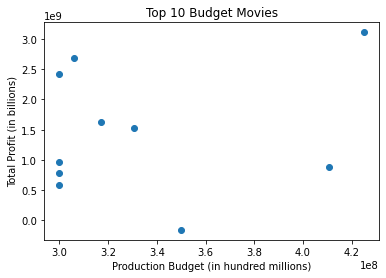

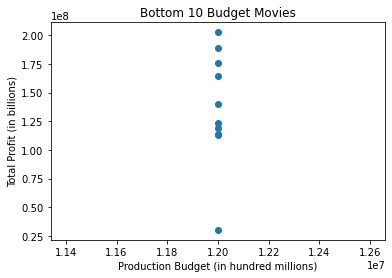

In [256]:


# Sort the dataframe by production_budget in descending order
Movie_budgets_sorted = Movie_budgets.sort_values(by='production_budget', ascending=False)

# Get the top 10 movies with the highest production budget
top_budget_movies = Movie_budgets_sorted.head(10)

# Get the top 10 movies with the lowest production budget
bottom_budget_movies = Movie_budgets_sorted.tail(10)

# Create a scatter plot for the top budget movies
plt.scatter(top_budget_movies['production_budget'], top_budget_movies['total_profit'])
plt.title('Top 10 Budget Movies')
plt.xlabel('Production Budget (in hundred millions)')
plt.ylabel('Total Profit (in billions)')
plt.show()

# Create a scatter plot for the bottom budget movies
plt.scatter(bottom_budget_movies['production_budget'], bottom_budget_movies['total_profit'])
plt.title('Bottom 10 Budget Movies')
plt.xlabel('Production Budget (in hundred millions)')
plt.ylabel('Total Profit (in billions)')
plt.show()


In [257]:
r = Movie_budgets['production_budget'].corr(Movie_budgets['total_profit'])
print(r)

0.6095951463452114


In [263]:

r =top_budget_movies['production_budget'].corr (top_budget_movies['total_profit'])
print(r)

0.17975195651139284


In [264]:
r =bottom_budget_movies['production_budget'].corr (bottom_budget_movies['total_profit'])
print(r)

nan


An even more Interesting find  this seem to be as the production budget as the total profit made by movies in this dataset seem to have no relation. Does this mean that the budget may not dictate success?. My assumstion is due to the incredibale ammount of outlier and other factors such as genre in play the production cost may not be strong engough of a relation to affect success. 

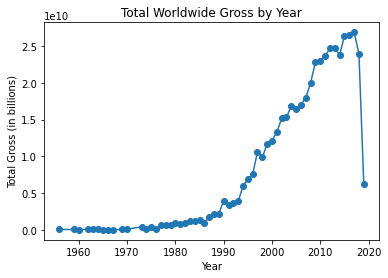

In [158]:
# Convert release_date column to datetime object
Movie_budgets['release_date'] = pd.to_datetime(Movie_budgets['release_date'])

# Group by year and sum total gross
yearly_gross = Movie_budgets.groupby(Movie_budgets['release_date'].dt.year)['worldwide_gross'].sum()



# Create the plot
plt.plot(yearly_gross.index, yearly_gross.values, marker='o')
plt.title('Total Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in billions)')
plt.show()

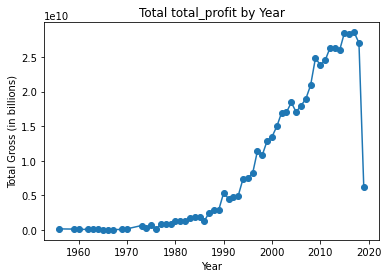

In [157]:
# Convert release_date column to datetime object
Movie_budgets['release_date'] = pd.to_datetime(Movie_budgets['release_date'])

# Group by year and sum total gross
yearly_gross = Movie_budgets.groupby(Movie_budgets['release_date'].dt.year)['total_profit'].sum()


# Create the plot
plt.plot(yearly_gross.index, yearly_gross.values, marker='o')
plt.title('Total total_profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in billions)')
plt.show()

This here may serve as an important peice to keep in mind when planing for film/movie. Here we see the sharp decrease of not only the Worldwide gross but as well as the Total profit over the year that is being made by movies/films. Is this a factor or the 2020 pandemic and the decrease of cinema use? It sure looks like so.  

### Conclusion for Movies budget Set :
This dataset has shown some insights on the no relation bewteen production budget and the total profit achieved by movies as well as the decrease on the Worldwide and total profit being made. 

### The Movies gross dataset

In [127]:
# the Movies gross dataset
df = pd.read_csv(r"C:\Users\Samuel\Desktop\Moringa_Work\dsc-phase-1-project-v2-4\bom.movie_gross.csv\bom.movie_gross.csv", encoding='unicode_escape')

Movie_gross = df
Movie_gross 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [128]:
# Determining the no. of records in our dataset
num_records = Movie_gross.shape[0]
print(num_records)

3387


In [129]:
# Checking whether each column has an appropriate datatype
Movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [130]:
# Previewing the top of our dataset
Movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [131]:
# Previewing the bottom of our dataset
Movie_gross.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [132]:
# identify missing data in the dataframe
Movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [133]:
# Dealing with the Missing Data
# Dropping rows with Foreign_gross and domestic_gross having no value
Movie_gross = Movie_gross.loc[Movie_gross['foreign_gross'].notna() & Movie_gross['domestic_gross'].notna()]

Movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [135]:
# change the data type for Foreign_gross
Movie_gross.iloc[:, 3] = pd.to_numeric(Movie_gross.iloc[:, 3], errors='coerce')
Movie_gross

C:\Users\Samuel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [136]:
Movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [137]:
Movie_gross['total_gross'] = Movie_gross['domestic_gross'] + Movie_gross['foreign_gross']

Movie_gross

<ipython-input-137-a9c868b954bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_gross['total_gross'] = Movie_gross['domestic_gross'] + Movie_gross['foreign_gross']


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [142]:
# The Movie with the highest total gross
highest_grossing_movie = Movie_gross.loc[Movie_gross['total_gross'].idxmax()]
print(highest_grossing_movie)

title                    Marvel's The Avengers
studio                                      BV
domestic_gross                       6.234e+08
foreign_gross                        8.955e+08
year                                      2012
total_gross                         1.5189e+09
title_year        Marvel's The Avengers (2012)
Name: 727, dtype: object


Apart from the obvious analysis here let keep keen on the repareance of the Marvel Franchise movies as well as Studio Buena Vista(BV)which is a subsidiary of the Walt Disney Company

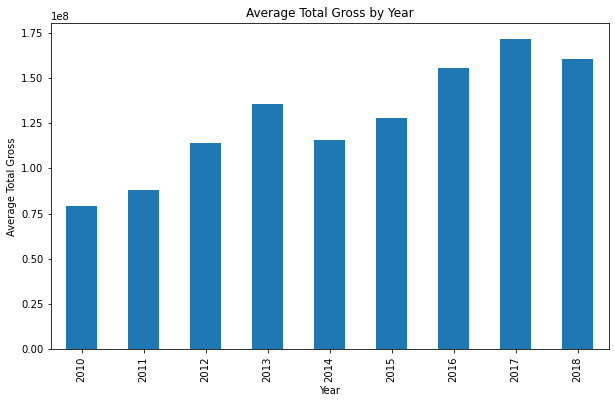

In [139]:
# Group the dataframe by year and calculate the mean of total_gross for each year
yearly_avg = Movie_gross.groupby('year')['total_gross'].mean()

# Create a bar plot using the yearly_avg dataframe
yearly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Average Total Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.show()


This relates to the above dataset on then decrease of total profit. Is the pandemic at play probalily 
but here the decrease start from 2018 

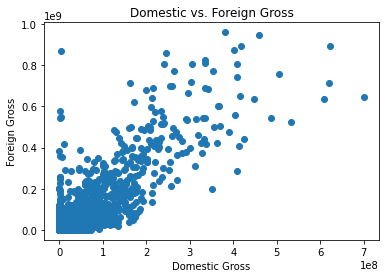

In [141]:
plt.scatter(Movie_gross['domestic_gross'], Movie_gross['foreign_gross'])
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic vs. Foreign Gross')
plt.show()

In [266]:
r =Movie_gross['domestic_gross']. corr (Movie_gross['foreign_gross'])
print(r)

0.8312285104850761


No relation between the two, infact form the data movies gain more foreign_gross than domestic _gross even with the decrease of the worldwide gross. Interesting.

In [185]:
# Group by studio and sum worldwide gross
studio_gross = Movie_gross.groupby('studio')['total_gross'].sum()

# Sort in descending order and take the first row
studio_highest_gross = studio_gross.sort_values(ascending=False).iloc[0]

# Find the studio with the highest gross
studio_with_highest_gross = studio_gross[studio_gross == studio_highest_gross].index[0]

print("The studio with the highest total gross is:", studio_with_highest_gross)

The studio with the highest total gross is: BV


In [192]:
studio_gross 

studio
BV              4.257488e+10
Fox             3.098037e+10
WB              3.079150e+10
Uni.            2.851551e+10
Sony            2.240472e+10
                    ...     
Darin Southa    9.840000e+04
ICir            7.960000e+04
ITL             5.290000e+04
WOW             4.940000e+04
Crnth           3.830000e+04
Name: total_gross, Length: 172, dtype: float64

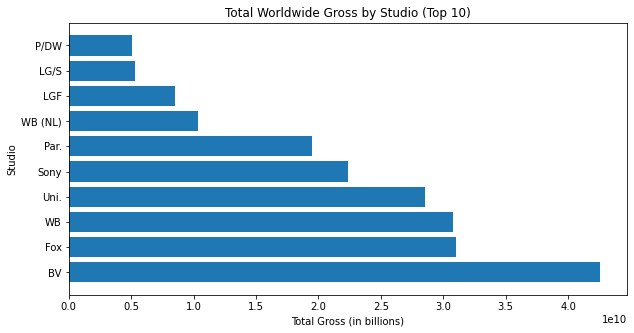

In [196]:
studio_gross =Movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False)[:10]

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(studio_gross.index, studio_gross.values)
ax.set_title('Total Worldwide Gross by Studio (Top 10)')
ax.set_xlabel('Total Gross (in billions)')
ax.set_ylabel('Studio')
plt.show()

## Conclusion 
Buena Vista (BV) is the market leader as of the data and the previous analysis back this. They make movies movies with the highest popularity based on the most polpular genre from Toy Story 3,Alice in Wonderland (2010) to The Marvel Franchise all in the Action, Superhero, Science Fiction, Adventure and Fantasy.There is also Avatar although not being from BV falls under that genre. Also although the decrease in the worldwide gross and total profit which may in turn be the reason for no relation with production budget,  the fact that worldwide/foreign_gross still weild more profits for the movies may lead me to assume the Production Budget are still kept high to produce something that attracts a wider audience. Whether The 2020 pandemic is the major role at play for decrease of profits or it an underlining factor that has gone unseen, it is currently no in the dataset and may need further extensive research.  